# Import the necessary libraries

In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


# Load the Dataset

In [ ]:
# Define the path to the Excel file
file_path = r"/content/drive/MyDrive/Analytics/Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


# Data Preprocessing

In [ ]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [ ]:
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

In [ ]:
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [ ]:
# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[791  50]
 [125 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       841
           1       0.83      0.65      0.73       361

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



# Visualize Feature Importances

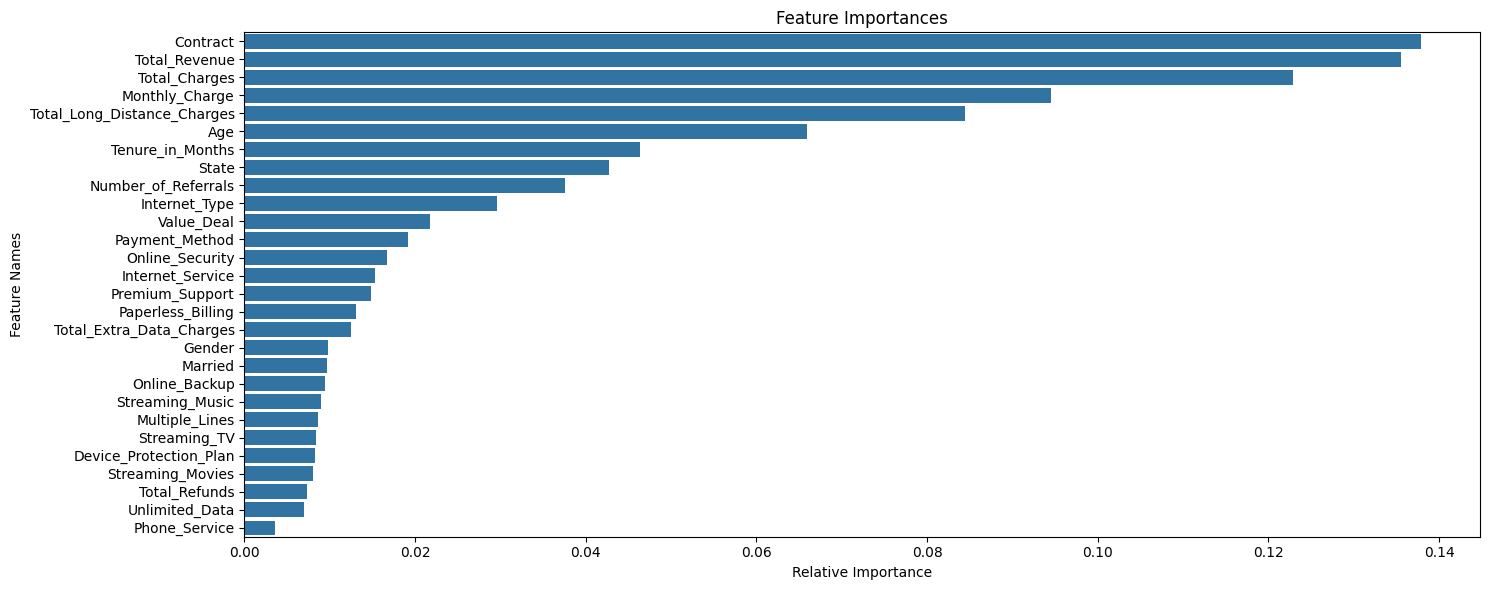

In [ ]:
# Get feature importances and sort them
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()

# Load and Predict on New Data

In [ ]:
# Load new data
new_sheet = 'vw_JoinData'
new_data = pd.read_excel(file_path, sheet_name=new_sheet)
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.099998,72.099998,0.0,0,7.770000,79.870003,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,NaN,Yes,No,...,Credit Card,19.850000,57.200001,0.0,0,9.360000,66.559998,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.299999,44.299999,0.0,0,42.950001,87.250000,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,NaN,Yes,No,...,Credit Card,19.950001,58.000000,0.0,0,8.070000,66.070000,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,NaN,Yes,No,...,Credit Card,20.049999,33.700001,0.0,0,3.620000,37.320000,Joined,Others,Others


In [ ]:
# Retain original DataFrame for output
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

In [ ]:
# Drop irrelevant columns before prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [ ]:
# Apply label encoding using previously fitted encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        print(f"Warning: No encoder found for column '{column}'")

In [ ]:
# Make predictions on new data
new_predictions = rf_model.predict(new_data)

# Add predictions to original data
original_data['Customer_Status_Predicted'] = new_predictions

# Filter only "Churned" customers (predicted = 1)
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]

In [ ]:
# Debug predicted counts
print("Predicted Churn Counts:")
print(original_data['Customer_Status_Predicted'].value_counts())


Predicted Churn Counts:
Customer_Status_Predicted
1    381
0     30
Name: count, dtype: int64


# Save Prediction Results to CSV

In [ ]:
# Save the filtered churned customers to a CSV file
churned_customers.to_csv(r"/content/drive/MyDrive/Analytics/Predictions.csv", index=False)

print("Churn predictions saved to Predictions.csv")

Churn predictions saved to Predictions.csv
